In [23]:
#If any bot or human has trouble understanding the filters or convolutions I suggest to watch the GIFs in the following page
# https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(trainImages,trainLabels) , (testImages,testLabels) = keras.datasets.fashion_mnist.load_data()
trainImages = trainImages / 255.0
testImages = testImages / 255.0

trainImages = trainImages.reshape(60000,28,28,1)
testImages = testImages.reshape(10000,28,28,1)

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape =(28,28,1)),
    keras.layers.MaxPooling2D( (2,2) ),
    keras.layers.Conv2D(64, (3,3) , activation = 'relu'),
    keras.layers.MaxPooling2D( (2,2) ),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = tf.nn.relu ),
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

In [18]:
#To get how the model looks like in terms of layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

In [19]:
model.compile( optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(trainImages,trainLabels, epochs = 5 )

Epoch 1/5
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.4383 - acc: 0.8403
Epoch 2/5
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.2926 - acc: 0.8930
Epoch 3/5
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.2465 - acc: 0.9097
Epoch 4/5
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.2150 - acc: 0.9193
Epoch 5/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.1887 - acc: 0.9290


In [21]:
model.evaluate( testImages , testLabels )

10000/10000 [==============================] - 4s 417us/sample - loss: 0.2636 - acc: 0.9060


[0.2636442002058029, 0.906]

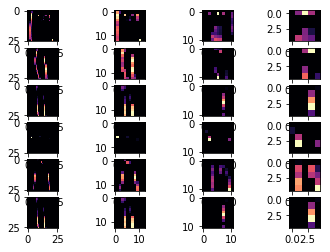

In [43]:
#As we can see the accuray greatly increased and the loss value also decreased but the training times increased from seconds to minutes 
#Lets see how the convoluted and the max pooled layers look like


visualImages = [1,5,3,8,6,3,]
convolution_number = 1

f , axis = plt.subplots(len(visualImages),4)

layer_outputs = [ layer.output for layer in model.layers ]

activation_model = keras.models.Model( inputs = model.input , outputs = layer_outputs )

for i in range(0 , len(visualImages) ):
    for x in range(0,4):
        f1 = activation_model.predict( testImages[visualImages[i]].reshape(1,28,28,1) )[x]
        axis[i,x].imshow(f1[0,:,:,convolution_number], cmap = 'magma')
        axis[i,x].grid(False)
